In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#import time library and the datetime module
import time
from datetime import datetime

#import requests and api key
import requests
from config import weather_api_key

In [2]:
#create a set  of random lat and long combos
#-------------------------CHANGE SIZE TO 1500 BEFORE SUBMISSION----------------------------
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#get lat and long combo in sets
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

27.612882948318813 -49.67203188280129
-55.37485660965129 56.145456278670224
-7.983052476639514 30.904927678774072
2.6767262856762244 57.48132401115396
65.84418037404063 42.09379642771009
30.752953862196634 -45.858206036368955
-37.57792050966758 58.18146986196027
5.521032732139901 17.047111266588686
30.48900214948675 -29.78413236464055
-18.10903959714139 19.192961726039755
52.01873329645062 77.72445463641344
68.64782300060179 -31.26565587805368
60.71784195028741 -13.825272638558047
26.530979893848126 37.78155956623618
-33.42212596679726 34.19604105805628
-87.0818354763267 -19.504463759422862
-4.559614679828428 -25.238691295820004
-34.677233483231184 -8.176072685931999
10.070674130516494 -80.73906656032958
-12.183251803582763 69.17236466478616
50.7515108512454 51.00620696522947
-85.08585048150246 13.72735862006354
58.58105904889479 -63.590774155681046
20.89826825156196 77.65084130042095
-80.69273495357308 4.2998935068206805
71.64999106030061 88.45396263397393
-8.493093089248887 -70.79257

60.76401343380937 87.00570091600989
62.59919924448624 18.91760557122781
75.10139699821497 45.655017624431906
74.72112002450373 -52.17731252457699
88.74442142295763 52.93895609459943
18.327826716379775 12.136479371810154
-35.51060465482793 1.0000201332429128
79.72145745925891 -49.58749449474908
-57.76298451576407 62.97630635623176
-28.987345280166288 79.05712151059561
4.709921267851541 -29.74398663788738
-41.18841258541286 -20.517718630416056
30.623529800329464 36.85113368648069
46.61061702402486 -58.26945065419694
17.177960888707176 51.260587006430285
-72.85553007520376 -8.033700314813842
67.31953090611623 7.380323759050938
60.96428653964469 78.69451858085361
0.8859860512211526 22.79631384214116
-36.19386757702612 -0.062302291188032655
-68.11088945955207 -47.07297660837851
55.06199730758789 -56.32671310563388
13.229380344248852 30.25519290051379
-23.43344007804926 51.03402154896722
-59.16388912626711 -55.032457560787435
-49.00134260247192 45.938768227046296
38.57722751513009 -79.841111

In [5]:
#create list for holding the cities
cities = []

#identify nearest city for each lat and long combo

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if city is unique, add to list
    if city not in cities:
        cities.append(city)
        
#print city count and confirm sufficiency
len(cities)

607

In [6]:
#build the url
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

#create list for holding the cities
city_data = []

#print beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#NOTA BENE: we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50.
#o do this, use for i in range(len(cities)) and the index to tell us when we get to 50. Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute after each set of 50 will prevent time-out errors. We can also retrieve the city from the cities list and add it to the city_url by using indexing,
#as shown in the following code:

#loop through all cities in our list
for i,city in enumerate (cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to record count
    record_count +=1

    #run api request for each city
    try:
        #parse json and retrieve data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #convert data in ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        #append city data to city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if error occur, skip city
    except:
        print("City not found. Skipping...")
        pass

#indicate data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | namanyere
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | lukovetskiy
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | bossembele
City not found. Skipping...
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | rundu
Processing Record 11 of Set 1 | aksu
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | umm lajj
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | cabedelo
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | palmas bellas
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | zachagansk
City not found. S

Processing Record 34 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 35 of Set 4 | bandar-e torkaman
City not found. Skipping...
Processing Record 36 of Set 4 | santa barbara
Processing Record 37 of Set 4 | beyneu
Processing Record 38 of Set 4 | westerland
Processing Record 39 of Set 4 | camacha
Processing Record 40 of Set 4 | namibe
Processing Record 41 of Set 4 | kaabong
Processing Record 42 of Set 4 | lasa
Processing Record 43 of Set 4 | atasu
Processing Record 44 of Set 4 | khuzdar
Processing Record 45 of Set 4 | moldovenesti
Processing Record 46 of Set 4 | viedma
Processing Record 47 of Set 4 | sechura
Processing Record 48 of Set 4 | porto nacional
Processing Record 49 of Set 4 | kinlochleven
Processing Record 50 of Set 4 | falkenberg
Processing Record 1 of Set 5 | arroyos y esteros
Processing Record 2 of Set 5 | guhagar
Processing Record 3 of Set 5 | buraydah
Processing Record 4 of Set 5 | san diego de los banos
Processing Record 5 of Set 5 | chipinge
Processin

Processing Record 24 of Set 8 | abay
Processing Record 25 of Set 8 | zeerust
Processing Record 26 of Set 8 | dwarka
Processing Record 27 of Set 8 | marsh harbour
Processing Record 28 of Set 8 | najran
Processing Record 29 of Set 8 | bara
Processing Record 30 of Set 8 | xuddur
Processing Record 31 of Set 8 | kristiansand
Processing Record 32 of Set 8 | tsumeb
Processing Record 33 of Set 8 | kisoro
Processing Record 34 of Set 8 | teguise
Processing Record 35 of Set 8 | bud
Processing Record 36 of Set 8 | marovoay
Processing Record 37 of Set 8 | valpacos
Processing Record 38 of Set 8 | faya
Processing Record 39 of Set 8 | carnarvon
Processing Record 40 of Set 8 | skjervoy
Processing Record 41 of Set 8 | sao miguel do oeste
City not found. Skipping...
Processing Record 42 of Set 8 | warqla
City not found. Skipping...
Processing Record 43 of Set 8 | abnub
Processing Record 44 of Set 8 | soyo
Processing Record 45 of Set 8 | berbera
Processing Record 46 of Set 8 | sandy bay
Processing Record 

Processing Record 16 of Set 12 | novyye lapsary
Processing Record 17 of Set 12 | skelleftea
Processing Record 18 of Set 12 | mahajanga
Processing Record 19 of Set 12 | shubarkuduk
Processing Record 20 of Set 12 | pestovo
Processing Record 21 of Set 12 | skotina
Processing Record 22 of Set 12 | fulopszallas
Processing Record 23 of Set 12 | koulikoro
Processing Record 24 of Set 12 | nacala
Processing Record 25 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 26 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 27 of Set 12 | tigzirt
Processing Record 28 of Set 12 | beloha
Processing Record 29 of Set 12 | kristallopiyi
City not found. Skipping...
Processing Record 30 of Set 12 | antropovo
Processing Record 31 of Set 12 | loiza
Processing Record 32 of Set 12 | asfi
Processing Record 33 of Set 12 | sambava
Processing Record 34 of Set 12 | sakakah
Processing Record 35 of Set 12 | dibaya
City not found. Skipping...
Processing Record 36 of Set 12 | hornepay

In [28]:
len(city_data)

557

In [29]:
#convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,8.92,87,99,2.13,AU,2022-10-02 21:24:42
1,Namanyere,-7.5167,31.0500,20.37,29,98,3.28,TZ,2022-10-02 21:24:42
2,Victoria,22.2855,114.1577,28.51,88,13,2.24,HK,2022-10-02 21:24:43
3,Lukovetskiy,64.2956,41.9211,5.52,92,100,2.34,RU,2022-10-02 21:24:43
4,Torbay,47.6666,-52.7314,9.10,70,75,5.14,CA,2022-10-02 21:24:43
5,Saint-Philippe,-21.3585,55.7679,18.77,78,34,4.67,RE,2022-10-02 21:24:43
6,Ribeira Grande,38.5167,-28.7000,22.16,88,100,4.69,PT,2022-10-02 21:24:44
7,Rundu,-17.9333,19.7667,22.42,19,0,2.16,NA,2022-10-02 21:24:44
8,Aksu,41.1231,80.2644,13.32,26,97,1.63,CN,2022-10-02 21:24:45
9,Tasiilaq,65.6145,-37.6368,4.09,97,100,11.28,GL,2022-10-02 21:24:45


In [9]:
#re-arrange the column headers
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2022-10-02 21:24:42,-38.2667,141.9667,8.92,87,99,2.13
1,Namanyere,TZ,2022-10-02 21:24:42,-7.5167,31.0500,20.37,29,98,3.28
2,Victoria,HK,2022-10-02 21:24:43,22.2855,114.1577,28.51,88,13,2.24
3,Lukovetskiy,RU,2022-10-02 21:24:43,64.2956,41.9211,5.52,92,100,2.34
4,Torbay,CA,2022-10-02 21:24:43,47.6666,-52.7314,9.10,70,75,5.14
5,Saint-Philippe,RE,2022-10-02 21:24:43,-21.3585,55.7679,18.77,78,34,4.67
6,Ribeira Grande,PT,2022-10-02 21:24:44,38.5167,-28.7000,22.16,88,100,4.69
7,Rundu,NA,2022-10-02 21:24:44,-17.9333,19.7667,22.42,19,0,2.16
8,Aksu,CN,2022-10-02 21:24:45,41.1231,80.2644,13.32,26,97,1.63
9,Tasiilaq,GL,2022-10-02 21:24:45,65.6145,-37.6368,4.09,97,100,11.28


In [10]:
#create the output csv file
output_data_file = "weather_data\cities.csv"

#export the city_data into the csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
#extract relevant fields from the Dframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

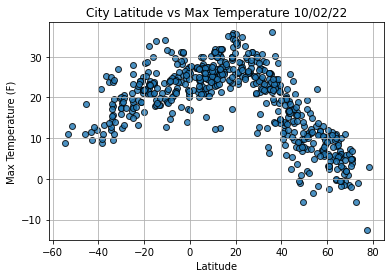

In [12]:
#import time module
import time

#build scatter plot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig1.png")

#display the chart
plt.show()

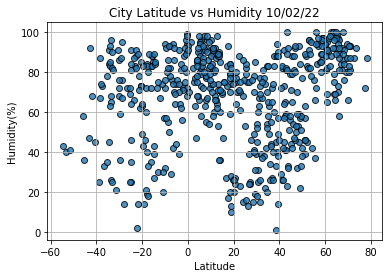

In [13]:
#import time module
import time

#build scatter plot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig2.png")

#display the chart
plt.show()

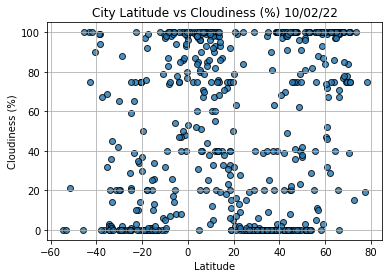

In [14]:
#build scatter plot for lat vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig3.png")

#display the chart
plt.show()

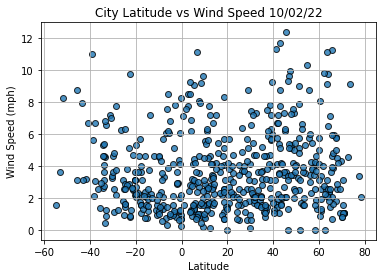

In [15]:
#build scatter plot for lat vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the image
plt.savefig("weather_data\Fig4.png")

#display the chart
plt.show()

In [16]:
#import linear regression from scipy stats module
from scipy.stats import linregress

In [17]:
#create function to create perform linear regression on weather data
#and plot regression line and eq with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run linear regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the eq of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #create scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #annotate the text for the line eq
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
#show info at index 13 in the city_data df
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-10-02 21:20:38
Lat                         -54.8
Lng                         -68.3
Max Temp                     8.81
Humidity                       43
Cloudiness                      0
Wind Speed                   1.54
Name: 13, dtype: object

In [19]:
#creating a df for northern hemisphere (lat >=0) and southern hemisphere (lat <0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

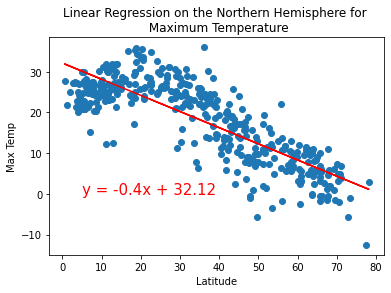

In [20]:
#perform linear regression on northern hemi on max temp
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Maximum Temperature', 'Max Temp',(5,0))

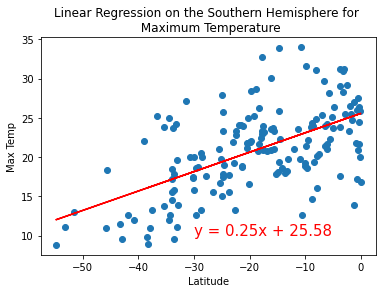

In [21]:
#perform linear regression on southern hemi on max temp
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n Maximum Temperature', 'Max Temp',(-30,10))

# FINDINGS:
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

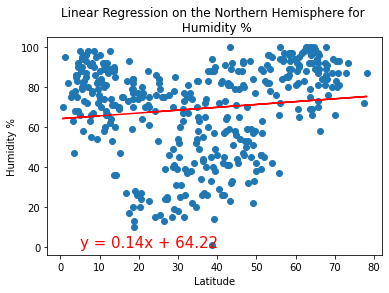

In [22]:
#perform linear regression on northern hemi on humidity
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Humidity %', 'Humidity %',(5,0))

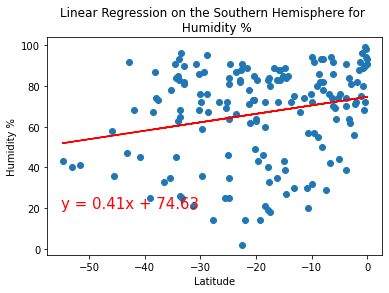

In [23]:
#perform linear regression on southern hemi on humidity
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n Humidity %', 'Humidity %',(-55,20))

# FINDINGS:
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

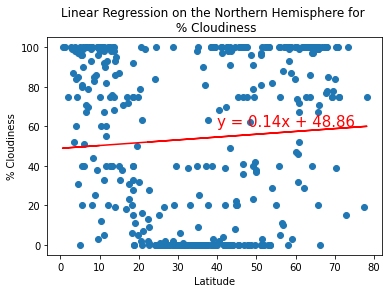

In [30]:
#perform linear regression on northern hemi on cloudiness
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n % Cloudiness', '% Cloudiness',(40,60))

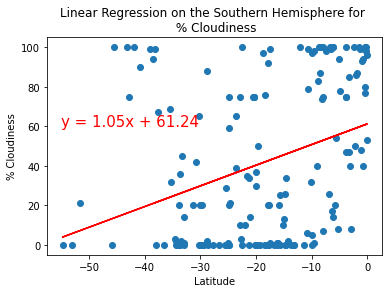

In [31]:
#perform linear regression on southern hemi on cloudiness
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n % Cloudiness', '% Cloudiness',(-55,60))

# Findings:
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

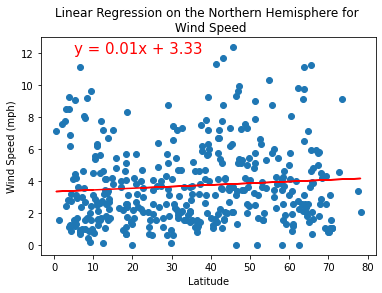

In [32]:
#perform linear regression on northern hemi on wind speed
#set the values/params before calling the method defined above

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Wind Speed', 'Wind Speed (mph)',(5,12))

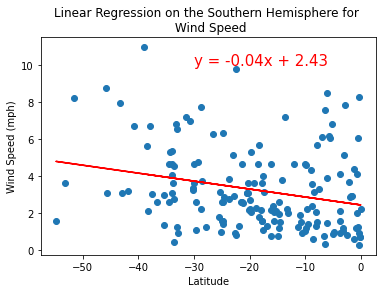

In [34]:
#perform linear regression on southern hemi on wind speed
#set the values/params before calling the method defined above

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n Wind Speed', 'Wind Speed (mph)',(-30,10))

# FINDINGS:
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 